In [6]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   ----------- ---------------------------- 92.2/323.6 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 204.8/323.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.9 MB 5.1 MB/s eta 0:00:04
   ---------------------------------------- 0.2/15.9 MB 2.9 MB/s eta 0:00:06
   ---------------------------------------- 0.2/15.9 MB 2.9 MB/s eta 0:00:06
   ---------------------------------------- 0.2/15.9 MB 2.9 MB/s eta 0:00:06
   ---------------------------------------- 0.2/15.9 MB 2.9 MB/s eta 0:00:06
    --------------------------------------- 0.3/15.9 MB 1.0 MB/s eta 0:00:16
    --------------------------------------- 0.3/15.9 MB 1.0 MB/s eta 0:00:16
 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import openpyxl
import os

# Análisis Metropolitano

## Tratar DB

In [2]:
# subir pgkg
# Seleccionar nivel de deshabitación: a,b,c,d
#Limpiar columnas no-numéricas


MAPA_ruta = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Test Mérida\Mérida_Subtipologias (2).gpkg"
MAPA_df = gpd.read_file(MAPA_ruta, layer='Mapa_Nac_Tipologias')

#limpiar columnas
MAPA_df_continuo = MAPA_df.drop(columns=[ 'CVE_ENT_x', 'CVE_MUN_x', 'CVE_LOC_x', 'CVE_AGEB_x',
       'CVE_MZA_x', 'AMBITO_x', 'TIPOMZA_x', 'NOMGEO_x', 'CVEMUN', 'CVE_MET', 'NOM_MET',
       'TIPO_MET', 'TIPO_MUN', 'CVE', 'geometry'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB == 'a']
MAPA_df_b = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB == 'b']
MAPA_df_c = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB == 'c']
MAPA_df_d = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB == 'd']

In [3]:
MAPA_df_a.columns

Index(['CVEGEO', 'POPTOT2010', 'POPTOT2020', 'VIVTOT2010', 'VIVTOT2020',
       'VIVPARDES2010', 'VIVPARDES2020', 'VIV1DO2010', 'VIV1DO2020',
       'VIV2YMDO2010', 'VIV2YMDO2020', 'VIV1C2010', 'VIV1C2020', 'VIV2C2010',
       'VIV2C2020', 'VIV3CYM2010', 'VIV3CYM2020', 'area_ha', 'FILTRADO',
       'DESHABITACION', 'PROM_DESHAB_MUN', 'TASA_POP_MUN', 'DIFPOP', 'DIFVIV',
       'RELPOP', 'RELVIV', 'CVEPOP', 'CVEVIV', 'TIPOLOGIA', 'DENS_POP20',
       'DENS_POP10', 'DENS_VIV20', 'DENS_VIV10', 'CUARTOS2010', 'CUARTOS2020',
       'CPERC2010', 'CPERC2020', 'HABXVIV2010', 'HABXVIV2020', 'R_DESHAB',
       'SUBTIPOLOGÍA'],
      dtype='object')

In [6]:
MAPA_df_a.dtypes

CVEGEO              object
POPTOT2010           int64
POPTOT2020           int64
VIVTOT2010           int64
VIVTOT2020           int64
VIVPARDES2010        int64
VIVPARDES2020        int64
VIV1DO2010           int64
VIV1DO2020           int64
VIV2YMDO2010         int64
VIV2YMDO2020         int64
VIV1C2010            int64
VIV1C2020            int64
VIV2C2010            int64
VIV2C2020            int64
VIV3CYM2010          int64
VIV3CYM2020          int64
area_ha            float64
FILTRADO           float64
DESHABITACION      float64
PROM_DESHAB_MUN    float64
TASA_POP_MUN       float64
DIFPOP               int64
DIFVIV               int64
RELPOP             float64
RELVIV             float64
CVEPOP              object
CVEVIV              object
TIPOLOGIA           object
DENS_POP20         float64
DENS_POP10         float64
DENS_VIV20         float64
DENS_VIV10         float64
CUARTOS2010          int64
CUARTOS2020          int64
CPERC2010          float64
CPERC2020          float64
H

## Análisis correlacional simple

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,VIVPARDES2010,VIVPARDES2020,VIV1DO2010,VIV1DO2020,VIV2YMDO2010,VIV2YMDO2020,...,DENS_POP20,DENS_POP10,DENS_VIV20,DENS_VIV10,CUARTOS2010,CUARTOS2020,CPERC2010,CPERC2020,HABXVIV2010,HABXVIV2020
POPTOT2010,1.000000,0.818509,0.945875,0.747884,0.561762,0.585327,0.744968,0.545479,0.912491,0.737917,...,0.146533,0.449883,0.031559,0.385709,0.915900,0.729006,-0.146946,-0.106459,0.274342,0.214708
POPTOT2020,0.818509,1.000000,0.789371,0.940603,0.415094,0.733959,0.668286,0.726291,0.710605,0.891603,...,0.185730,0.161213,0.071819,0.132027,0.714361,0.888482,-0.121073,-0.165994,0.138325,0.235667
VIVTOT2010,0.945875,0.789371,1.000000,0.771276,0.555088,0.612615,0.731426,0.541449,0.916865,0.763232,...,0.161604,0.440331,0.072266,0.468921,0.939626,0.766256,-0.026836,-0.024410,-0.001567,0.102975
VIVTOT2020,0.747884,0.940603,0.771276,1.000000,0.342155,0.795524,0.608371,0.733344,0.693701,0.899629,...,0.168671,0.118666,0.164161,0.129036,0.705949,0.921189,-0.034612,-0.009326,0.010769,-0.037818
VIVPARDES2010,0.561762,0.415094,0.555088,0.342155,1.000000,0.347579,0.576393,0.362960,0.445127,0.299099,...,-0.013366,0.286246,-0.085203,0.291038,0.448207,0.291404,-0.026057,-0.051794,0.017254,0.148981
VIVPARDES2020,0.585327,0.733959,0.612615,0.795524,0.347579,1.000000,0.514463,0.595425,0.530883,0.690757,...,0.056598,0.048891,0.084744,0.065058,0.546326,0.715429,-0.026436,-0.006764,-0.021328,-0.090319
VIV1DO2010,0.744968,0.668286,0.731426,0.608371,0.576393,0.514463,1.000000,0.678555,0.480287,0.452617,...,0.006337,0.192255,-0.054188,0.192883,0.586708,0.473672,-0.214269,-0.252128,0.084526,0.167807
VIV1DO2020,0.545479,0.726291,0.541449,0.733344,0.362960,0.595425,0.678555,1.000000,0.362651,0.441867,...,0.063103,-0.041824,0.075054,-0.029285,0.403175,0.554544,-0.187676,-0.232231,0.028312,0.033588
VIV2YMDO2010,0.912491,0.710605,0.916865,0.693701,0.445127,0.530883,0.480287,0.362651,1.000000,0.768131,...,0.210057,0.515684,0.108820,0.481276,0.970163,0.759145,0.062541,0.083026,0.144264,0.098469
VIV2YMDO2020,0.737917,0.891603,0.763232,0.899629,0.299099,0.690757,0.452617,0.441867,0.768131,1.000000,...,0.236571,0.231358,0.148498,0.227998,0.759800,0.964252,0.049703,0.109755,0.030481,0.079701


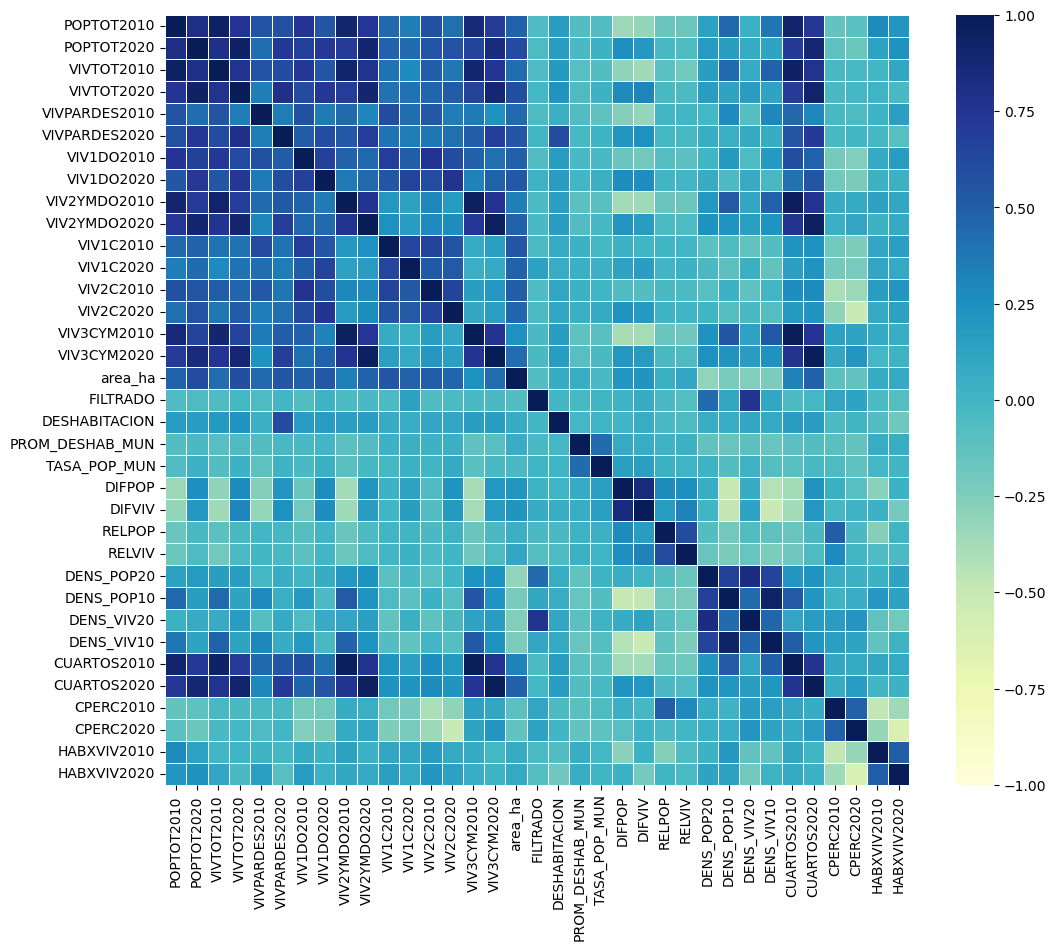

In [7]:
#df a analizar
MAPA_CM_f = MAPA_df_a

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()


,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,VIVPARDES2010,VIVPARDES2020,VIV1DO2010,VIV1DO2020,VIV2YMDO2010,VIV2YMDO2020,...,DENS_POP20,DENS_POP10,DENS_VIV20,DENS_VIV10,CUARTOS2010,CUARTOS2020,CPERC2010,CPERC2020,HABXVIV2010,HABXVIV2020
POPTOT2010,1.000000,0.772231,0.944091,0.696064,0.446399,0.645636,0.819878,0.578335,0.933629,0.685650,...,0.047473,0.380930,-0.056594,0.308698,0.941617,0.675518,-0.095481,-0.097147,0.260800,0.271860
POPTOT2020,0.772231,1.000000,0.774676,0.970396,0.257123,0.921059,0.677399,0.789922,0.706244,0.927249,...,0.140183,0.078404,0.066266,0.061890,0.723262,0.931143,-0.067889,-0.106041,0.088267,0.228510
VIVTOT2010,0.944091,0.774676,1.000000,0.735579,0.430524,0.697890,0.813369,0.581018,0.917937,0.728307,...,0.074547,0.344940,0.002138,0.381527,0.950661,0.721110,0.008153,-0.029475,-0.007259,0.167179
VIVTOT2020,0.696064,0.970396,0.735579,1.000000,0.193704,0.964419,0.617998,0.794617,0.663738,0.941930,...,0.134926,0.030173,0.124833,0.045882,0.688249,0.958989,-0.002334,0.003963,-0.011384,0.051569
VIVPARDES2010,0.446399,0.257123,0.430524,0.193704,1.000000,0.147652,0.450420,0.211459,0.366782,0.184403,...,-0.072009,0.282293,-0.155399,0.295158,0.371176,0.165974,-0.028324,-0.071136,0.014025,0.191998
VIVPARDES2020,0.645636,0.921059,0.697890,0.964419,0.147652,1.000000,0.579720,0.754383,0.621417,0.902249,...,0.132827,0.025007,0.132363,0.047915,0.652224,0.921786,-0.000011,0.009167,-0.029100,0.025586
VIV1DO2010,0.819878,0.677399,0.813369,0.617998,0.450420,0.579720,1.000000,0.675798,0.617095,0.511118,...,-0.035853,0.191133,-0.100820,0.195998,0.719689,0.532074,-0.144592,-0.196560,0.088717,0.202746
VIV1DO2020,0.578335,0.789922,0.581018,0.794617,0.211459,0.754383,0.675798,1.000000,0.437518,0.569643,...,0.074750,-0.079406,0.073406,-0.060279,0.480690,0.660140,-0.154985,-0.209008,0.014150,0.074835
VIV2YMDO2010,0.933629,0.706244,0.917937,0.663738,0.366782,0.621417,0.617095,0.437518,1.000000,0.714222,...,0.108967,0.437181,0.023773,0.382351,0.972441,0.694334,0.063532,0.052959,0.167166,0.179976
VIV2YMDO2020,0.685650,0.927249,0.728307,0.941930,0.184403,0.902249,0.511118,0.569643,0.714222,1.000000,...,0.164734,0.124415,0.119035,0.126572,0.720867,0.974903,0.070429,0.104237,0.007292,0.112081


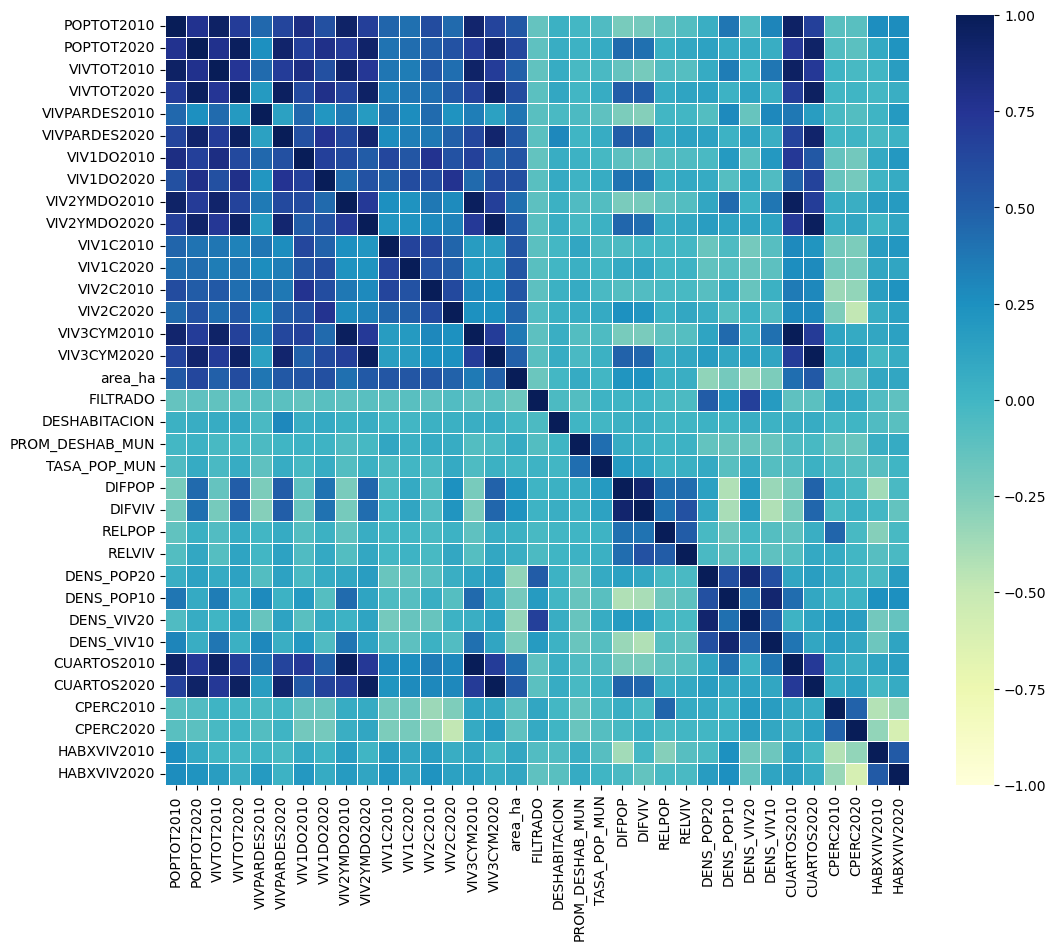

In [8]:
#df a analizar
MAPA_CM_f = MAPA_df_b

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,VIVPARDES2010,VIVPARDES2020,VIV1DO2010,VIV1DO2020,VIV2YMDO2010,VIV2YMDO2020,...,DENS_POP20,DENS_POP10,DENS_VIV20,DENS_VIV10,CUARTOS2010,CUARTOS2020,CPERC2010,CPERC2020,HABXVIV2010,HABXVIV2020
POPTOT2010,1.000000,0.599678,0.909413,0.495693,0.492373,0.425464,0.803077,0.388305,0.921704,0.525495,...,-0.049883,0.545402,-0.113017,0.440528,0.934091,0.524825,-0.136169,-0.085104,0.302298,0.297607
POPTOT2020,0.599678,1.000000,0.598710,0.950449,0.126744,0.865742,0.513203,0.748053,0.526958,0.900765,...,0.159407,0.118052,0.100035,0.106334,0.541615,0.908529,-0.115843,-0.137943,0.087876,0.270249
VIVTOT2010,0.909413,0.598710,1.000000,0.541352,0.499193,0.474273,0.802136,0.430836,0.861738,0.546961,...,-0.035713,0.485949,-0.080190,0.556588,0.901295,0.555805,-0.027024,-0.036432,-0.070816,0.175385
VIVTOT2020,0.495693,0.950449,0.541352,1.000000,0.063879,0.949398,0.443136,0.771344,0.460412,0.898704,...,0.164289,0.040108,0.152160,0.072180,0.484615,0.925709,-0.033526,-0.032783,-0.043347,0.051025
VIVPARDES2010,0.492373,0.126744,0.499193,0.063879,1.000000,0.042890,0.439509,0.050039,0.431881,0.098943,...,-0.174890,0.407123,-0.216003,0.423847,0.433430,0.083995,-0.020820,-0.056567,0.005385,0.196450
VIVPARDES2020,0.425464,0.865742,0.474273,0.949398,0.042890,1.000000,0.397403,0.720350,0.392157,0.816632,...,0.167984,-0.004311,0.171981,0.034157,0.418467,0.842061,-0.028147,-0.028268,-0.069027,-0.009825
VIV1DO2010,0.803077,0.513203,0.802136,0.443136,0.439509,0.397403,1.000000,0.493052,0.581022,0.359520,...,-0.068372,0.357032,-0.108095,0.365783,0.704810,0.389119,-0.174830,-0.158817,0.074645,0.208366
VIV1DO2020,0.388305,0.748053,0.430836,0.771344,0.050039,0.720350,0.493052,1.000000,0.258568,0.467752,...,0.140801,-0.032187,0.135136,0.024644,0.312169,0.589333,-0.174324,-0.216995,-0.052573,0.057035
VIV2YMDO2010,0.921704,0.526958,0.861738,0.460412,0.431881,0.392157,0.581022,0.258568,1.000000,0.552101,...,-0.024418,0.567849,-0.077377,0.475134,0.965268,0.541493,0.058604,0.040301,0.209260,0.204760
VIV2YMDO2020,0.525495,0.900765,0.546961,0.898704,0.098943,0.816632,0.359520,0.467752,0.552101,1.000000,...,0.151102,0.147273,0.108212,0.142764,0.548159,0.958657,0.035046,0.073798,0.025288,0.149336


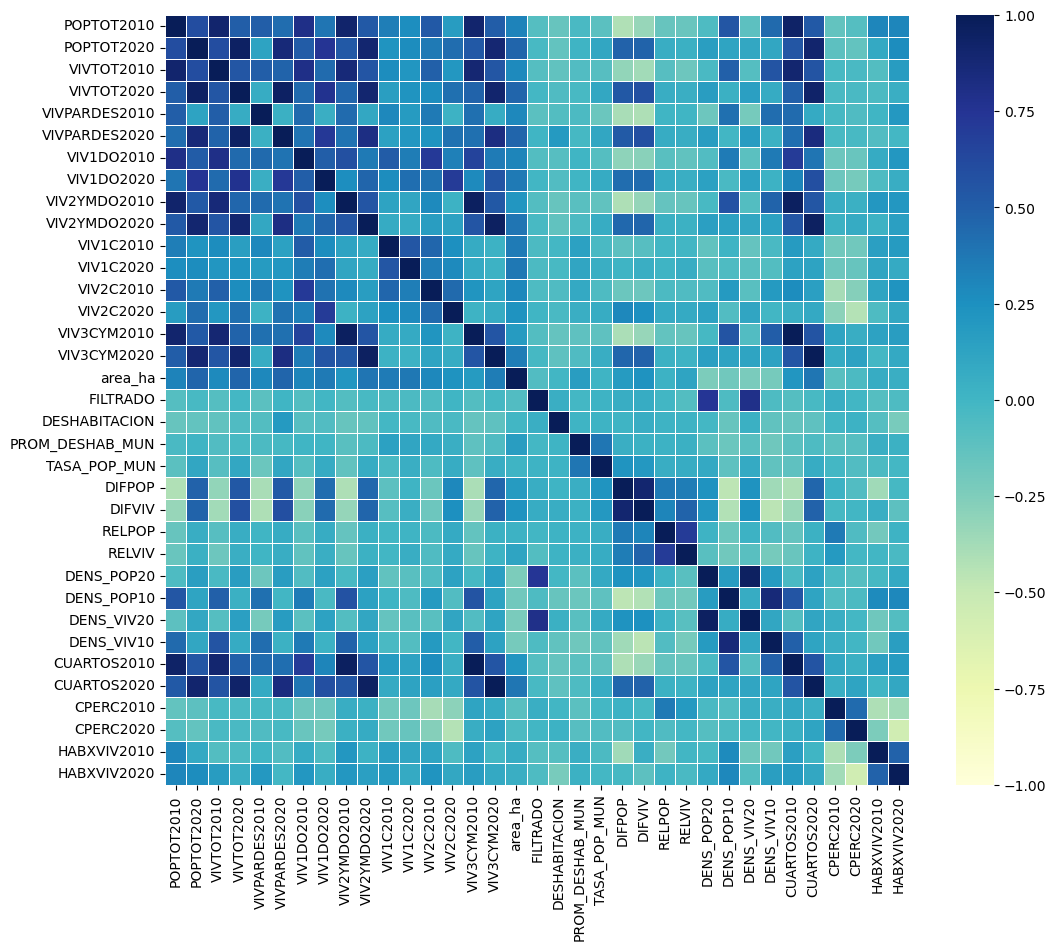

In [9]:
#df a analizar
MAPA_CM_f = MAPA_df_c

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,VIVPARDES2010,VIVPARDES2020,VIV1DO2010,VIV1DO2020,VIV2YMDO2010,VIV2YMDO2020,...,DENS_POP20,DENS_POP10,DENS_VIV20,DENS_VIV10,CUARTOS2010,CUARTOS2020,CPERC2010,CPERC2020,HABXVIV2010,HABXVIV2020
POPTOT2010,1.000000,0.508881,0.890475,0.377757,0.523330,0.237746,0.838348,0.399975,0.906169,0.419207,...,-0.005785,0.428989,-0.046721,0.456599,0.922495,0.435356,-0.293279,-0.189789,0.158210,0.127567
POPTOT2020,0.508881,1.000000,0.463980,0.894314,0.051523,0.721689,0.424574,0.764177,0.438114,0.908282,...,0.360358,0.139373,0.339989,0.193905,0.439170,0.914079,-0.287634,-0.316066,0.139629,0.122255
VIVTOT2010,0.890475,0.463980,1.000000,0.413966,0.542234,0.279889,0.843216,0.417029,0.872813,0.423986,...,-0.006931,0.363715,-0.029466,0.556219,0.914409,0.448577,-0.203480,-0.162015,-0.090844,-0.021895
VIVTOT2020,0.377757,0.894314,0.413966,1.000000,-0.043538,0.928171,0.347426,0.735360,0.374444,0.887823,...,0.306140,0.053116,0.371732,0.128664,0.384420,0.914033,-0.215869,-0.238334,-0.075742,-0.065567
VIVPARDES2010,0.523330,0.051523,0.542234,-0.043538,1.000000,-0.107164,0.488647,0.044802,0.481957,0.008186,...,-0.124418,0.403136,-0.198408,0.485475,0.500852,0.000550,0.047315,-0.083652,NaN,0.072462
VIVPARDES2020,0.237746,0.721689,0.279889,0.928171,-0.107164,1.000000,0.231322,0.570955,0.238859,0.736134,...,0.215286,-0.007441,0.323059,0.045943,0.252277,0.754885,-0.179399,-0.189897,-0.079260,-0.078197
VIV1DO2010,0.838348,0.424574,0.843216,0.347426,0.488647,0.231322,1.000000,0.434009,0.677515,0.326823,...,-0.012659,0.351175,-0.041822,0.442309,0.804241,0.358249,-0.192566,-0.165837,-0.029043,-0.000042
VIV1DO2020,0.399975,0.764177,0.417029,0.735360,0.044802,0.570955,0.434009,1.000000,0.328255,0.555923,...,0.282528,0.098068,0.290159,0.182370,0.354226,0.691786,-0.218961,-0.215766,-0.042244,-0.013376
VIV2YMDO2010,0.906169,0.438114,0.872813,0.374444,0.481957,0.238859,0.677515,0.328255,1.000000,0.441558,...,-0.013538,0.385412,-0.037299,0.439502,0.961168,0.459434,-0.136693,-0.122858,-0.021754,-0.006420
VIV2YMDO2020,0.419207,0.908282,0.423986,0.887823,0.008186,0.736134,0.326823,0.555923,0.441558,1.000000,...,0.337949,0.106939,0.340078,0.169852,0.433177,0.955437,-0.190000,-0.186901,-0.044325,-0.020285


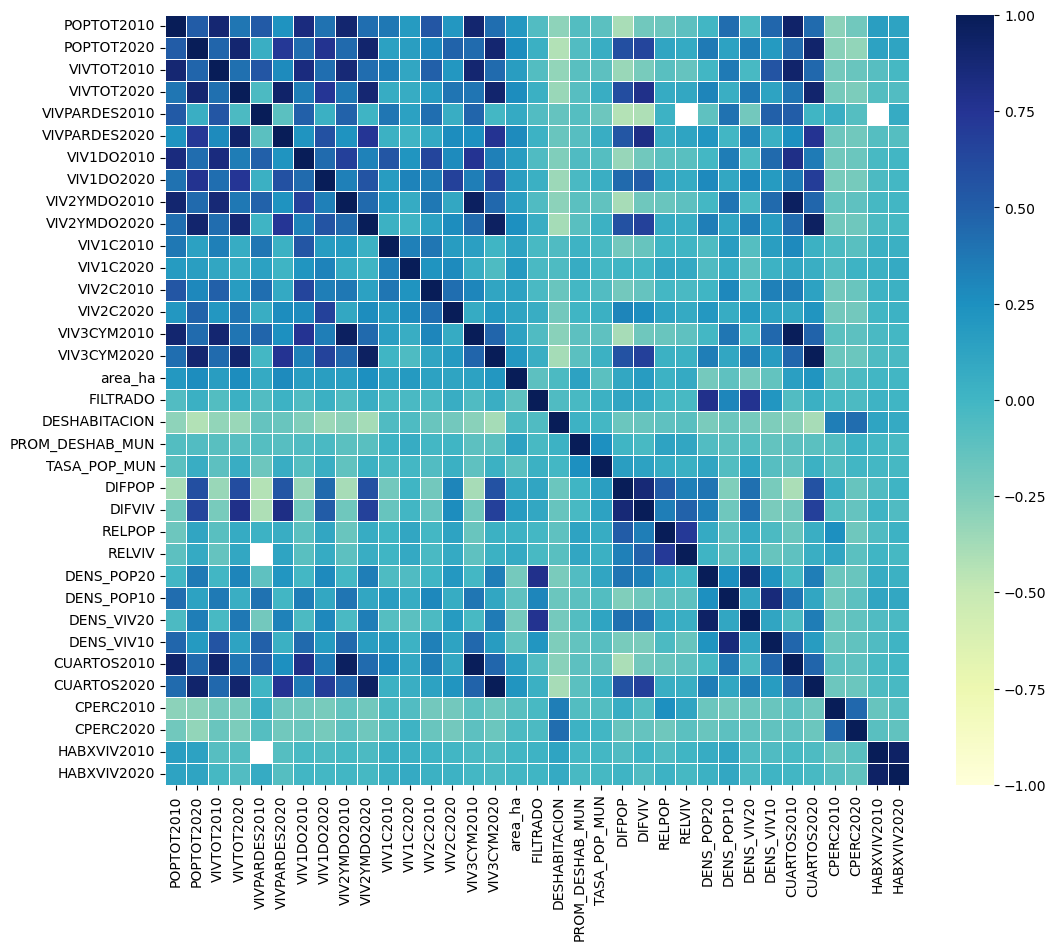

In [10]:
#df a analizar
MAPA_CM_f = MAPA_df_d

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

## Análisis factorial

In [109]:
# Nombre del archivo y nombre de la pestaña donde deseas guardar los datos
excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Test Mérida\Mérida_Factorial.xlsx"

In [ ]:
sheet_name = 'Deshab FULL'

In [ ]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_a

#hacer CVEGEO index y borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'CVEPOP', 'CVEVIV', 'TIPOLOGIA', 'R_DESHAB',
       'SUBTIPOLOGÍA'])

MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [ ]:
# Escribir los loadings en la pestaña especificada del archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
        
    # Agregar título a la tabla de loadings
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Loadings')

print("El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.")

### Rango a

In [110]:
sheet_name = 'Deshab A'

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Chi square
nan nan

Modelo KMO
0.7020148689998534

Valores propios
[ 1.20021439e+01  5.92835079e+00  3.23582278e+00  2.54524010e+00
  1.94258658e+00  1.44472399e+00  1.34764559e+00  1.13772961e+00
  9.61524553e-01  7.13733340e-01  6.40861905e-01  4.63850706e-01
  4.04309294e-01  3.42179783e-01  3.24592133e-01  2.96507239e-01
  2.31346280e-01  2.15437853e-01  2.05638922e-01  1.58495231e-01
  1.17016791e-01  1.00211798e-01  7.63845612e-02  5.36776143e-02
  3.34001228e-02  3.08497663e-02  2.50414692e-02  1.00982492e-02
  8.13251824e-03  1.46469124e-03  1.00188180e-03  1.00679797e-15
  7.20417263e-16 -2.71871435e-17 -1.03835052e-16]


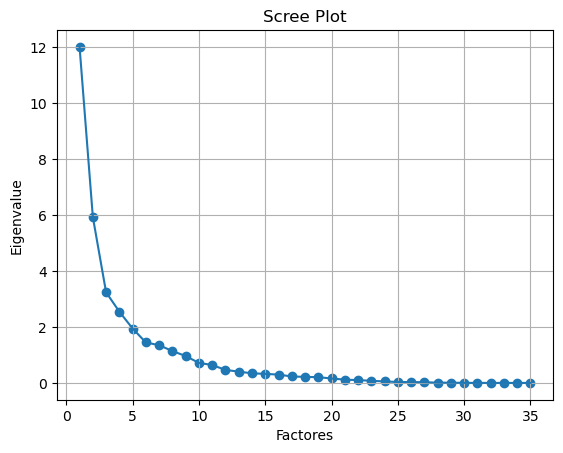

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.848041,0.429220,0.063340,-0.198086,0.170209,-0.098060,0.052729
POPTOT2020,0.830854,0.461971,0.026475,0.219799,0.127483,-0.003685,0.139395
VIVTOT2010,0.886917,0.362288,0.093251,-0.184457,-0.103788,-0.056887,0.095678
VIVTOT2020,0.872248,0.410192,0.030961,0.230192,-0.085078,-0.012546,0.081866
VIVPARDES2010,0.163556,0.728140,0.027924,0.081310,0.002728,0.036853,-0.224206
VIVPARDES2020,0.672888,0.383602,-0.031933,0.215509,-0.245085,-0.074252,0.136067
VIV1DO2010,0.421233,0.729589,-0.032676,-0.088206,-0.039803,-0.087216,0.259574
VIV1DO2020,0.467309,0.696135,-0.067638,0.138203,-0.094041,-0.026435,0.220631
VIV2YMDO2010,0.924062,0.104143,0.134479,-0.222935,0.060246,-0.050605,-0.119670
VIV2YMDO2020,0.926672,0.153953,0.089752,0.237291,0.014972,0.010053,-0.041390


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,9.614467,5.538829,4.298869,2.357137,1.784382,1.756563,1.359166
Proportion Var,0.274699,0.158252,0.122825,0.067347,0.050982,0.050188,0.038833
Cumulative Var,0.274699,0.432951,0.555776,0.623123,0.674105,0.724293,0.763126


In [111]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_a

#hacer CVEGEO index y borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'CVEPOP', 'CVEVIV', 'TIPOLOGIA', 'R_DESHAB',
       'SUBTIPOLOGÍA'])

MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [112]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.


### Rango b

In [113]:
sheet_name = 'Deshab B'

Chi square
651168.816859188 0.0

Modelo KMO
0.7142911507882673

Valores propios
[ 1.29957646e+01  5.37058153e+00  3.17800725e+00  2.62046479e+00
  1.78935751e+00  1.39097483e+00  1.13231248e+00  9.83912291e-01
  9.17162653e-01  7.95410794e-01  6.20776209e-01  5.85323805e-01
  4.37868521e-01  3.93436648e-01  3.13726314e-01  2.84339992e-01
  2.43986196e-01  2.28273431e-01  1.83939547e-01  1.41047332e-01
  1.28478132e-01  9.14551408e-02  4.99396930e-02  3.72892334e-02
  2.92439022e-02  2.30684528e-02  1.78410545e-02  8.60674027e-03
  6.08596347e-03  8.42751617e-04  4.82200853e-04  1.46335942e-15
  9.26228335e-17 -2.46020566e-16 -6.80427151e-16]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


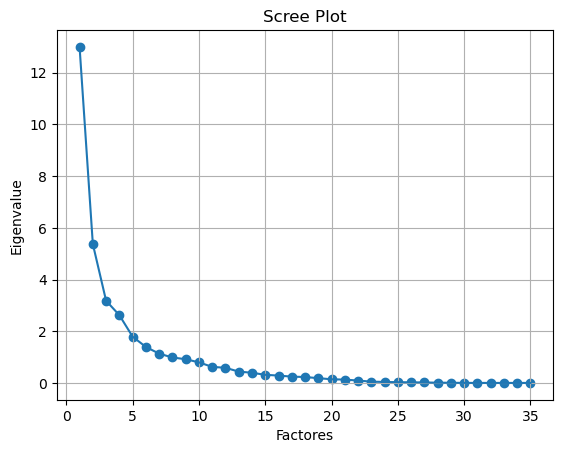

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.881982,0.410547,0.022442,-0.111538,0.143090,-0.103544,-0.038855
POPTOT2020,0.861886,0.418077,0.001544,0.177402,0.145786,0.143157,0.006129
VIVTOT2010,0.915791,0.334450,0.043818,-0.111120,-0.019180,0.166988,0.019986
VIVTOT2020,0.883835,0.385593,0.004100,0.200390,-0.015864,0.170512,0.009280
VIVPARDES2010,0.124968,0.422386,-0.014140,0.104688,-0.061129,-0.033508,-0.032938
VIVPARDES2020,0.855437,0.315327,0.001212,0.205278,-0.022986,0.223151,-0.000085
VIV1DO2010,0.563765,0.693482,-0.036959,-0.115865,0.089169,0.125313,0.003976
VIV1DO2020,0.550177,0.700834,-0.056592,0.117813,0.045446,0.186638,-0.017642
VIV2YMDO2010,0.948085,0.115878,0.080635,-0.101762,-0.004251,-0.124393,-0.027113
VIV2YMDO2020,0.939407,0.150966,0.049466,0.189751,-0.009401,0.106001,0.019461


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,10.566842,4.904864,4.311529,2.296560,2.165241,1.275850,1.231985
Proportion Var,0.301910,0.140139,0.123187,0.065616,0.061864,0.036453,0.035200
Cumulative Var,0.301910,0.442049,0.565235,0.630851,0.692715,0.729168,0.764368


In [114]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_b

#hacer CVEGEO index y borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'CVEPOP', 'CVEVIV', 'TIPOLOGIA', 'R_DESHAB',
       'SUBTIPOLOGÍA'])

MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [116]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab B del archivo Excel.


#### filtro

In [60]:
# Check for highly correlated variables
correlation_matrix = MAPA_df_f.corr()
highly_correlated = (correlation_matrix > 0.95) & (correlation_matrix < 1.0)

print("Highly Correlated Variables:\n", highly_correlated)

# Drop one of each pair of highly correlated variables
variables_to_drop = set()
for var in highly_correlated.columns:
    variables_to_drop.update(set(highly_correlated.index[highly_correlated[var]]))
MAPA_df_f_fil = MAPA_df_f.drop(columns=variables_to_drop)


Highly Correlated Variables:
                  POPTOT2010  POPTOT2020  VIVTOT2010  VIVTOT2020  \
POPTOT2010            False       False       False       False   
POPTOT2020            False       False       False        True   
VIVTOT2010            False       False       False       False   
VIVTOT2020            False        True       False       False   
VIVPARDES2010         False       False       False       False   
VIVPARDES2020         False       False       False        True   
VIV1DO2010            False       False       False       False   
VIV1DO2020            False       False       False       False   
VIV2YMDO2010          False       False       False       False   
VIV2YMDO2020          False       False       False       False   
VIV1C2010             False       False       False       False   
VIV1C2020             False       False       False       False   
VIV2C2010             False       False       False       False   
VIV2C2020             False     

Chi square
69883.99353734334 0.0

Modelo KMO
0.7076519475766768

Valores propios
[6.77526956 3.03151305 2.5092063  2.09317066 1.38042314 1.13396099
 1.02940669 0.970062   0.87093756 0.78042157 0.59838876 0.56862027
 0.41171424 0.37973864 0.28350073 0.26586861 0.22795392 0.19624915
 0.1448121  0.11570706 0.10790382 0.08035818 0.03664213 0.00817087]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


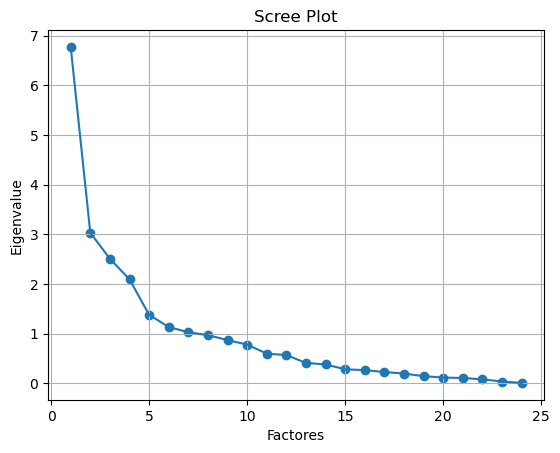

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.566542,0.072221,-0.072457,0.754522,0.002618,0.273232
VIVTOT2010,0.485414,0.075030,-0.021026,0.863768,-0.026069,-0.003251
VIVPARDES2010,0.457899,0.001320,0.075769,0.015284,-0.058206,-0.003216
VIV1DO2010,0.765274,-0.006404,-0.069110,0.476353,0.118697,-0.008889
VIV1DO2020,0.777658,-0.027442,0.157753,0.451952,0.115240,-0.039059
VIV1C2010,0.773089,-0.112546,-0.016494,-0.031100,0.109633,0.085102
VIV1C2020,0.795710,-0.085016,0.059002,0.013156,0.049875,0.060742
VIV2C2010,0.797630,-0.047316,-0.054918,0.134650,0.260181,0.036192
VIV2C2020,0.737018,-0.019875,0.103499,0.244304,0.334773,-0.068820
area_ha,0.697874,-0.253821,0.178120,0.233966,-0.001082,0.094264


,A1,A2,A3,A4,A5,A6
SS Loadings,5.117024,2.449042,2.227803,2.034418,1.820465,1.464311
Proportion Var,0.213209,0.102043,0.092825,0.084767,0.075853,0.061013
Cumulative Var,0.213209,0.315253,0.408078,0.492845,0.568698,0.629711


In [61]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_f_fil

#hacer CVEGEO index y borrar columnas

# MAPA_df_f = MAPA_df_f.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

# MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

### Rango c

In [117]:
sheet_name = 'Deshab C'

Chi square
599522.4277551026 0.0

Modelo KMO
0.6687589850255874

Valores propios
[ 1.13019962e+01  5.32093240e+00  3.21902841e+00  3.02755074e+00
  1.91769555e+00  1.28509129e+00  1.22897652e+00  1.14839629e+00
  1.06891096e+00  8.97502510e-01  7.44731783e-01  6.81589864e-01
  5.04128120e-01  4.18821342e-01  3.97097159e-01  3.44584423e-01
  2.84424235e-01  2.54501277e-01  2.22616974e-01  1.98738517e-01
  1.49306191e-01  1.32911798e-01  7.22771313e-02  5.23583817e-02
  4.16728126e-02  3.68824142e-02  2.47328625e-02  1.13539551e-02
  8.13194531e-03  1.84987593e-03  1.20806985e-03  1.05086837e-15
  8.34996410e-16 -7.19523600e-17 -6.73630992e-16]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


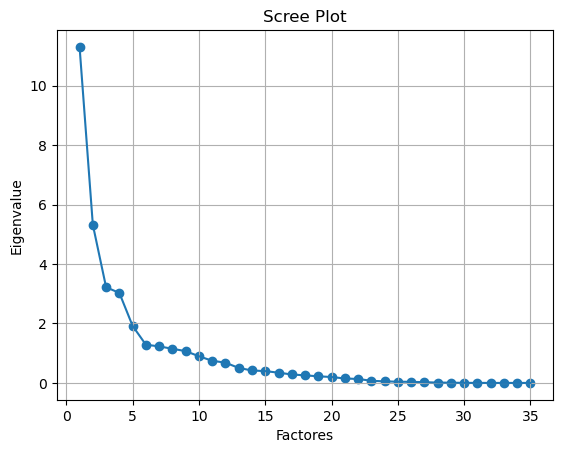

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.875941,0.036150,0.314142,-0.248873,0.216525,-0.069381,0.104294
POPTOT2020,0.858542,0.013179,0.342108,0.298000,0.168287,0.041418,0.130512
VIVTOT2010,0.899998,0.099242,0.348051,-0.032169,-0.101607,-0.100332,-0.118787
VIVTOT2020,0.892052,0.024445,0.315558,0.260789,-0.072578,0.042456,0.161764
VIVPARDES2010,0.112012,-0.044750,0.142118,0.044688,-0.051273,-0.010302,0.276811
VIVPARDES2020,0.817378,0.003257,0.325707,0.216147,-0.152366,0.051148,0.193005
VIV1DO2010,0.560297,-0.001318,0.684047,-0.107907,-0.010088,-0.068199,0.032729
VIV1DO2020,0.550560,-0.015856,0.651957,0.198948,-0.073551,0.040871,0.132185
VIV2YMDO2010,0.910559,0.092970,-0.051316,-0.256503,0.111397,-0.051533,0.028593
VIV2YMDO2020,0.921559,0.071129,0.009104,0.249918,0.056718,0.035932,0.108208


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,10.102673,4.375602,3.694384,2.395798,2.035748,1.756001,1.305358
Proportion Var,0.288648,0.125017,0.105554,0.068451,0.058164,0.050171,0.037296
Cumulative Var,0.288648,0.413665,0.519219,0.587670,0.645834,0.696006,0.733302


In [118]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_c

#hacer CVEGEO index y borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'CVEPOP', 'CVEVIV', 'TIPOLOGIA', 'R_DESHAB',
       'SUBTIPOLOGÍA'])

MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [119]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab C del archivo Excel.


#### filtro

In [63]:
# Check for highly correlated variables
correlation_matrix = MAPA_df_f.corr()
highly_correlated = (correlation_matrix > 0.95) & (correlation_matrix < 1.0)

print("Highly Correlated Variables:\n", highly_correlated)

# Drop one of each pair of highly correlated variables
variables_to_drop = set()
for var in highly_correlated.columns:
    variables_to_drop.update(set(highly_correlated.index[highly_correlated[var]]))
MAPA_df_f_fil = MAPA_df_f.drop(columns=variables_to_drop)


Highly Correlated Variables:
                  POPTOT2010  POPTOT2020  VIVTOT2010  VIVTOT2020  \
POPTOT2010            False       False       False       False   
POPTOT2020            False       False       False        True   
VIVTOT2010            False       False       False       False   
VIVTOT2020            False        True       False       False   
VIVPARDES2010         False       False       False       False   
VIVPARDES2020         False       False       False       False   
VIV1DO2010            False       False       False       False   
VIV1DO2020            False       False       False       False   
VIV2YMDO2010          False       False       False       False   
VIV2YMDO2020          False       False       False       False   
VIV1C2010             False       False       False       False   
VIV1C2020             False       False       False       False   
VIV2C2010             False       False       False       False   
VIV2C2020             False     

Chi square
90222.91723404109 0.0

Modelo KMO
0.661107433154583

Valores propios
[5.91320206e+00 4.81077972e+00 2.80947301e+00 2.40813456e+00
 1.43219165e+00 1.23002981e+00 1.17482012e+00 1.06551195e+00
 1.05616629e+00 8.90582615e-01 7.27498728e-01 6.70458075e-01
 4.33352858e-01 4.05939833e-01 3.94745585e-01 3.33579513e-01
 2.48605473e-01 2.28671697e-01 2.14489401e-01 1.59942102e-01
 1.26950345e-01 1.06540927e-01 6.88383011e-02 4.20559834e-02
 2.92088713e-02 1.24864863e-02 5.74402568e-03]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


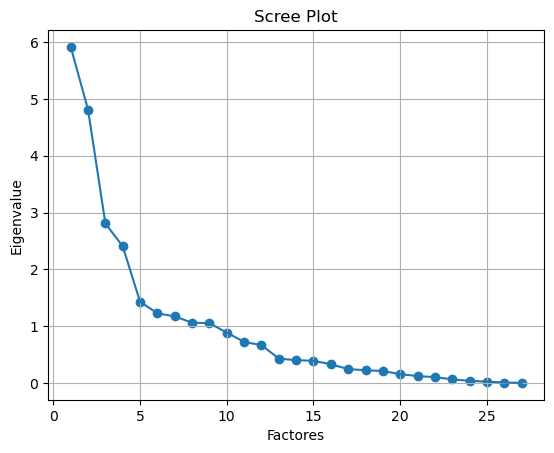

,A1,A2,A3,A4,A5,A6,A7,A8,A9
POPTOT2010,0.087068,0.899691,0.097973,-0.158548,0.197652,-0.067786,0.078814,0.236739,-0.114952
VIVTOT2010,0.137825,0.943256,0.120846,-0.042074,0.094459,-0.082923,-0.011061,-0.152229,-0.077663
VIVPARDES2010,-0.021995,0.122881,-0.017114,0.085143,0.351230,-0.018137,-0.017698,-0.002773,0.012476
VIVPARDES2020,0.047192,0.879997,0.112411,0.327535,0.198184,0.049777,-0.076203,-0.024548,0.255564
VIV1DO2010,0.020599,0.675276,0.486419,-0.124579,0.288845,-0.041978,0.045152,-0.032473,-0.036909
VIV1DO2020,-0.001596,0.635837,0.532773,0.247533,0.261578,0.044540,-0.038514,-0.051271,-0.082667
VIV1C2010,-0.161984,0.103133,0.315660,-0.060883,0.645905,0.020955,0.142686,0.029376,0.011045
VIV1C2020,-0.128049,0.158755,0.291959,0.103792,0.623230,0.032175,0.029432,0.080835,-0.040848
VIV2C2010,-0.026860,0.323009,0.647511,-0.039816,0.264868,-0.045491,0.174763,0.034327,-0.004644
VIV2C2020,-0.004120,0.292533,0.754040,0.218960,0.173737,0.036257,0.146487,-0.077233,-0.018008


,A1,A2,A3,A4,A5,A6,A7,A8,A9
SS Loadings,4.300956,3.830506,2.098896,1.931181,1.748715,1.711378,1.588824,1.392573,0.763706
Proportion Var,0.159295,0.141871,0.077737,0.071525,0.064767,0.063384,0.058845,0.051577,0.028285
Cumulative Var,0.159295,0.301165,0.378902,0.450427,0.515195,0.578579,0.637424,0.689001,0.717286


In [64]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_f_fil

#hacer CVEGEO index y borrar columnas

# MAPA_df_f = MAPA_df_f.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

# MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=9, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8','A9']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8','A9']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

### Rango d

In [120]:
sheet_name = 'Deshab D'

Chi square: 196550.67936714337 p_value: 0.0
Modelo KMO: 0.685880636151951
Valores propios
[ 1.15159460e+01  4.37491712e+00  3.66745529e+00  2.33732494e+00
  1.97429911e+00  1.58007880e+00  1.15866675e+00  1.09866928e+00
  1.01372448e+00  8.59252984e-01  6.65538571e-01  5.95466316e-01
  5.45845904e-01  4.95701843e-01  4.04034719e-01  3.69444374e-01
  3.01999818e-01  2.29953491e-01  1.85322059e-01  1.67000620e-01
  1.32053389e-01  7.82373705e-02  7.16253788e-02  5.91486057e-02
  4.62625244e-02  2.89113879e-02  1.97338295e-02  1.43212651e-02
  5.41137241e-03  3.65237898e-03  1.34999912e-15  5.38376636e-16
  2.64749505e-16 -1.57287911e-15]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


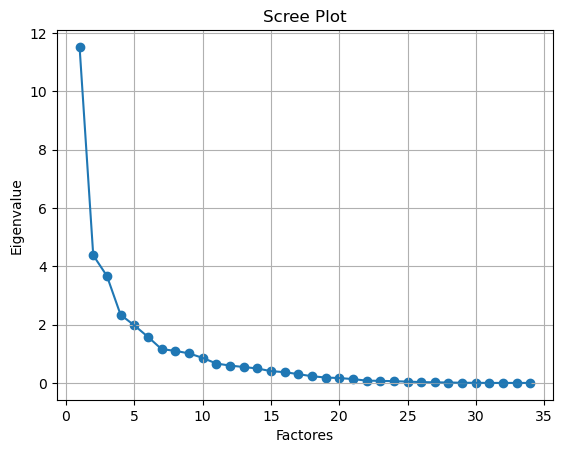

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.871079,0.044830,0.272884,-0.187205,0.159841,-0.152959,0.150894
POPTOT2020,0.813901,0.062504,0.338974,0.265701,0.165944,0.060186,0.244351
VIVTOT2010,0.890214,0.074476,0.235672,-0.227310,-0.092962,-0.064832,0.091008
VIVTOT2020,0.907421,0.025284,0.279068,0.217973,-0.080294,0.047441,0.111131
VIVPARDES2020,0.812142,-0.017997,0.272055,0.165105,-0.079621,0.050536,0.042445
VIV1DO2010,0.656393,0.050263,0.596756,-0.251673,-0.050010,-0.044231,0.077573
VIV1DO2020,0.609637,0.061050,0.605720,0.269057,-0.052166,0.028327,0.102928
VIV2YMDO2010,0.918146,0.046073,-0.061218,-0.164238,-0.018056,-0.127950,0.009603
VIV2YMDO2020,0.911678,0.072520,0.021651,0.191240,-0.026953,0.044162,0.106983
VIV1C2010,0.027062,-0.058821,0.519918,-0.061933,0.025821,0.023070,-0.000969


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,10.404347,4.279776,2.599216,2.174125,2.050950,1.857645,1.514355
Proportion Var,0.306010,0.125876,0.076448,0.063945,0.060322,0.054637,0.044540
Cumulative Var,0.306010,0.431886,0.508334,0.572278,0.632600,0.687237,0.731777


In [121]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_d

#hacer CVEGEO index y borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'CVEPOP', 'CVEVIV', 'TIPOLOGIA', 'R_DESHAB', 'VIVPARDES2010',
       'SUBTIPOLOGÍA'])

MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# Escalar los datos
scaler = StandardScaler()
MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

# Pruebas de esfericidad de Bartlett y KMO
chi_square_value, p_value = calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square:', chi_square_value, 'p_value:', p_value)

kmo_all, kmo_model = calculate_kmo(MAPA_df_f)
print('Modelo KMO:', kmo_model)

# Análisis factorial
fa = FactorAnalyzer(n_factors=41, rotation=None)
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Crear scree plot
plt.scatter(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.plot(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
fa.fit(MAPA_df_f)
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Obtener la varianza de cada factor
fa.get_factor_variance()
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_names, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
display(varianza_df)

In [122]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab D del archivo Excel.


#### filtro

In [81]:
# Check for highly correlated variables
correlation_matrix = MAPA_df_f.corr()
highly_correlated = (correlation_matrix > 0.95) & (correlation_matrix < 1.0)

print("Highly Correlated Variables:\n", highly_correlated)

# Drop one of each pair of highly correlated variables
variables_to_drop = set()
for var in highly_correlated.columns:
    variables_to_drop.update(set(highly_correlated.index[highly_correlated[var]]))
MAPA_df_f_fil = MAPA_df_f.drop(columns=variables_to_drop)


Highly Correlated Variables:
                  POPTOT2010  POPTOT2020  VIVTOT2010  VIVTOT2020  \
POPTOT2010            False       False       False       False   
POPTOT2020            False       False       False       False   
VIVTOT2010            False       False       False       False   
VIVTOT2020            False       False       False       False   
VIVPARDES2020         False       False       False       False   
VIV1DO2010            False       False       False       False   
VIV1DO2020            False       False       False       False   
VIV2YMDO2010          False       False       False       False   
VIV2YMDO2020          False       False       False       False   
VIV1C2010             False       False       False       False   
VIV1C2020             False       False       False       False   
VIV2C2010             False       False       False       False   
VIV2C2020             False       False       False       False   
VIV3CYM2010           False     

In [53]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_f_fil

#hacer CVEGEO index y borrar columnas

# MAPA_df_f = MAPA_df_f.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

# MAPA_df_f = MAPA_df_f.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

Chi square
nan nan

Modelo KMO
nan



C:\Users\Alejandro\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:90: RuntimeWarning: invalid value encountered in divide
  x = (x - np.mean(x, axis=0)) / np.std(x, axis=0, ddof=0)


ValueError: array must not contain infs or NaNs

#### revisión de datos

In [74]:
print(MAPA_df_f.describe())

         POPTOT2010    POPTOT2020    VIVTOT2010    VIVTOT2020  VIVPARDES2010  \
count  1.106000e+03  1.106000e+03  1.106000e+03  1.106000e+03         1106.0   
mean   9.636656e-18  2.569775e-17  3.854662e-17 -1.284887e-17            0.0   
std    1.000452e+00  1.000452e+00  1.000452e+00  1.000452e+00            0.0   
min   -9.746384e-01 -9.974182e-01 -9.383291e-01 -9.854406e-01            0.0   
25%   -7.438281e-01 -7.781415e-01 -7.862160e-01 -8.495177e-01            0.0   
50%   -3.151804e-01 -2.664959e-01 -2.538199e-01 -1.699035e-01            0.0   
75%    3.772505e-01  4.278804e-01  4.306893e-01  4.417492e-01            0.0   
max    4.960484e+00  6.677266e+00  6.667329e+00  7.305852e+00            0.0   

       VIVPARDES2020   VIV1DO2010    VIV1DO2020  VIV2YMDO2010  VIV2YMDO2020  \
count   1.106000e+03  1106.000000  1.106000e+03  1.106000e+03  1.106000e+03   
mean    3.212219e-18     0.000000 -2.569775e-17 -1.284887e-17  2.890997e-17   
std     1.000452e+00     1.000452  1.00045

In [75]:
for column in MAPA_df_f.columns:
    nans = MAPA_df_f[column].isna().sum()
    infs = np.isinf(MAPA_df_f[column]).sum()
    if nans > 0 or infs > 0:
        print(f"Columna {column} tiene {nans} NaNs y {infs} valores infinitos")


C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


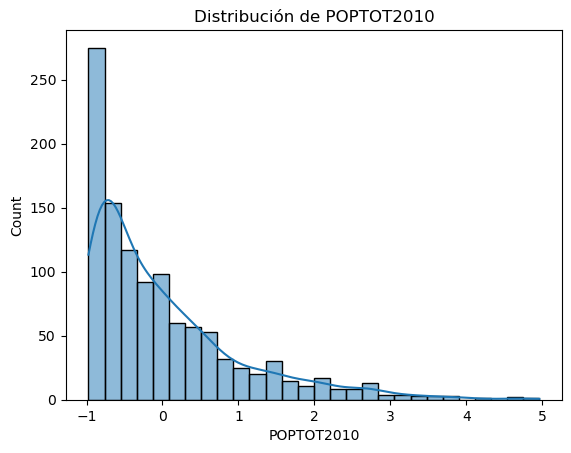

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


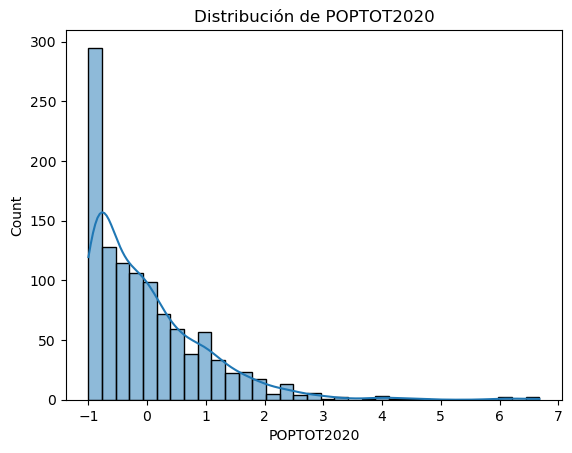

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


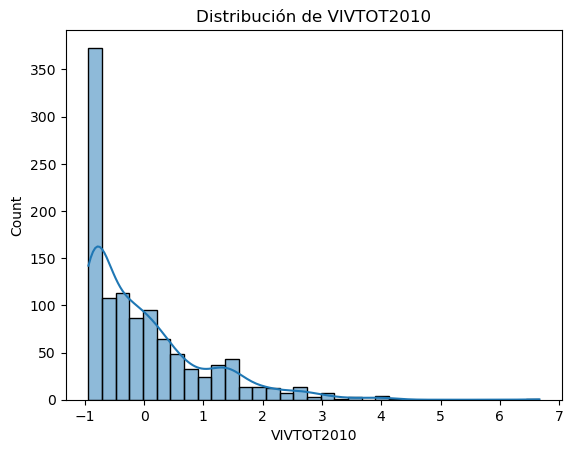

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


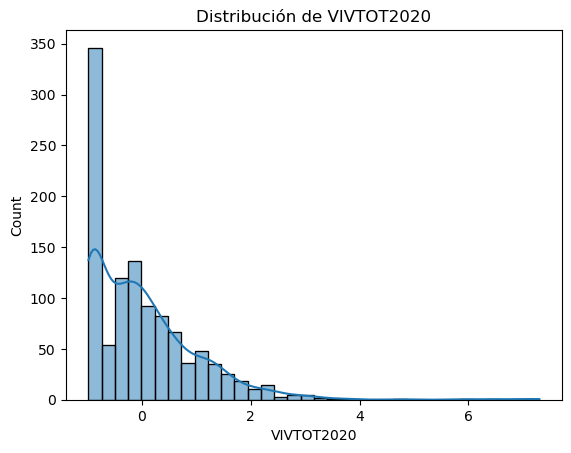

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


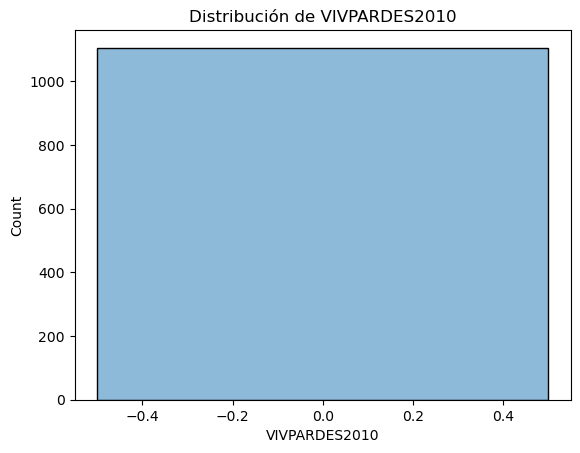

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


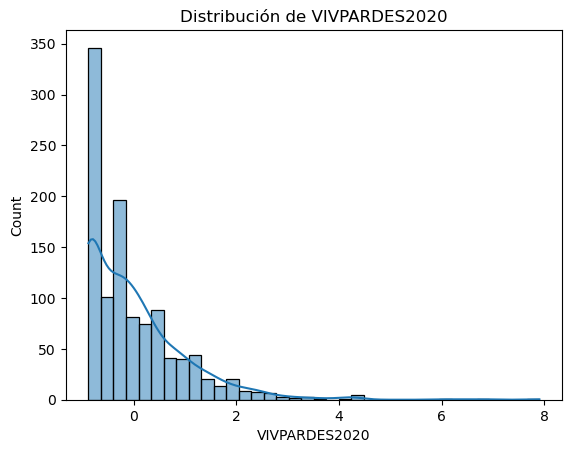

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


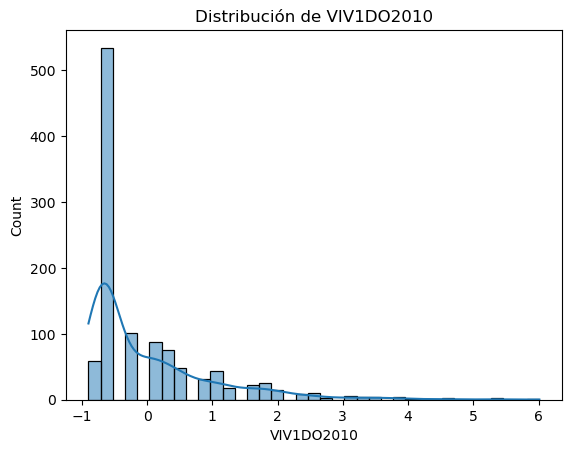

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


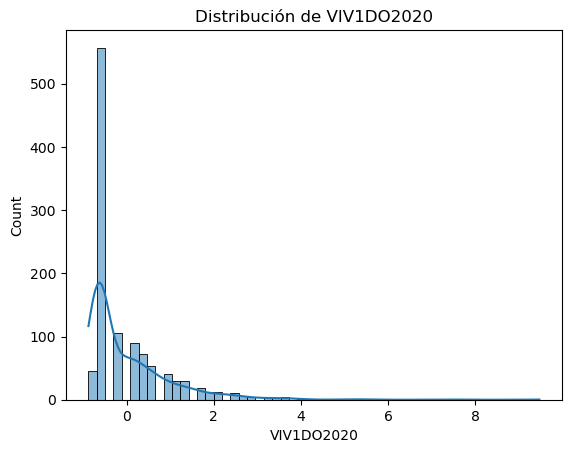

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


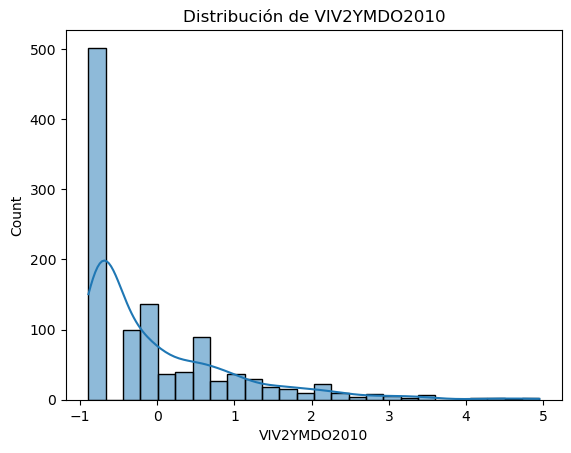

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


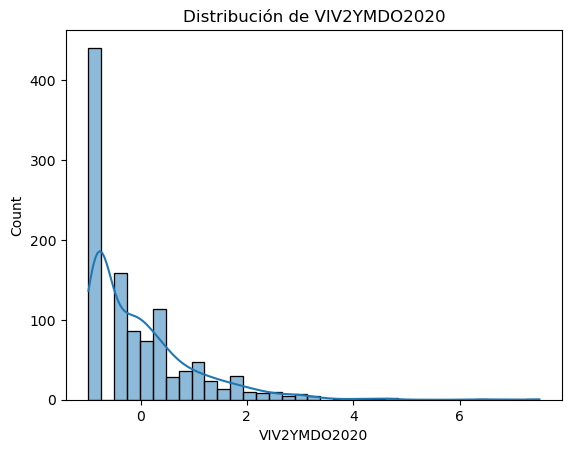

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


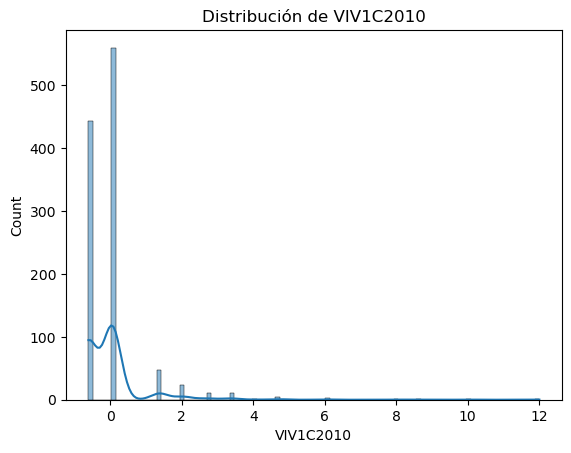

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


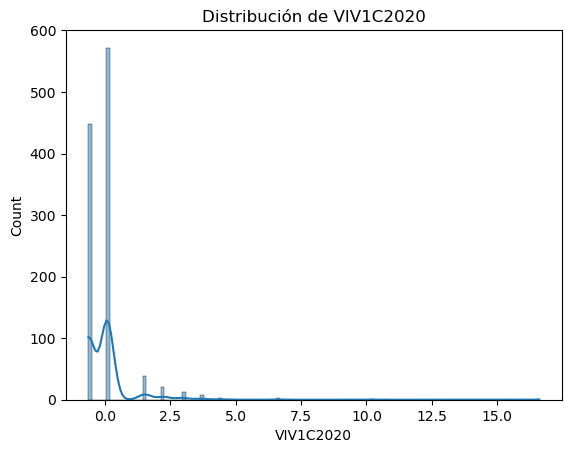

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


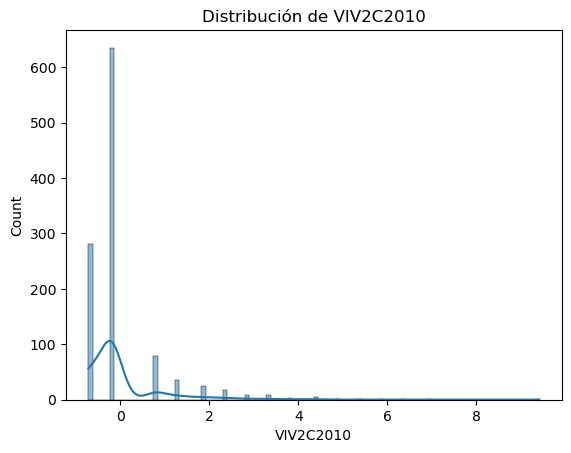

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


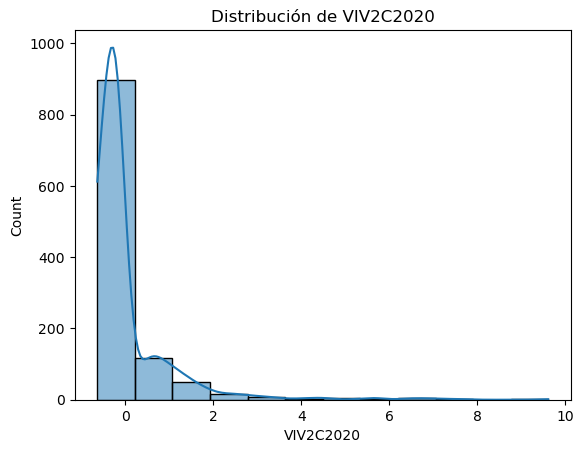

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


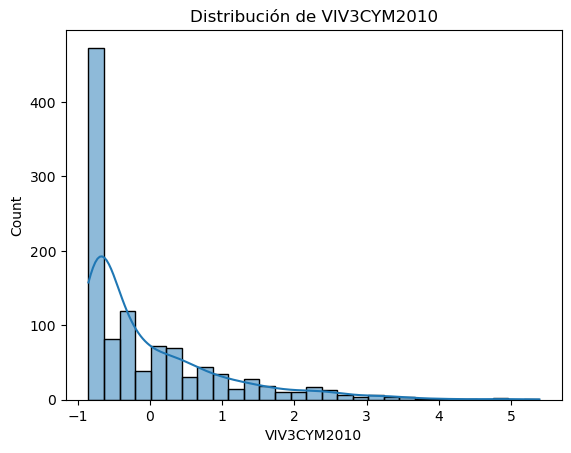

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


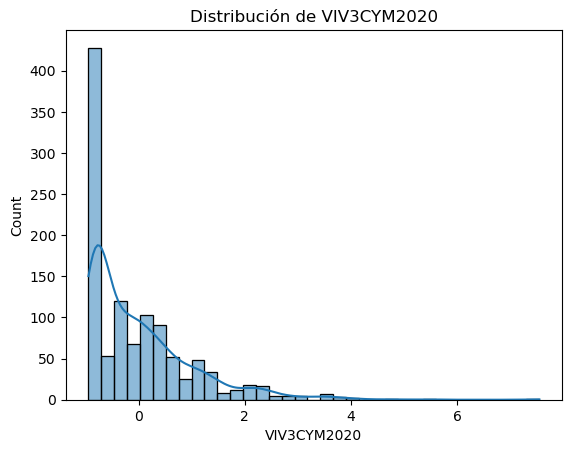

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


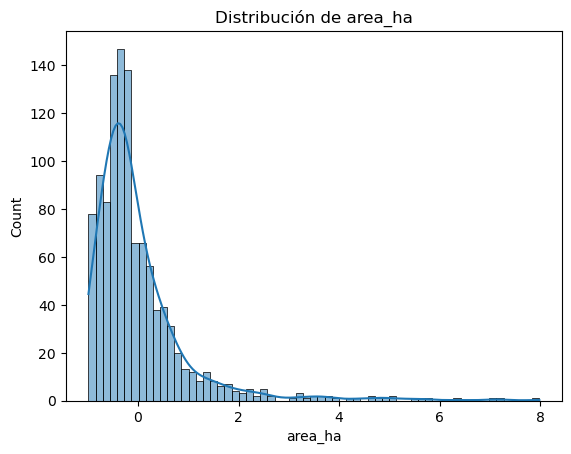

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


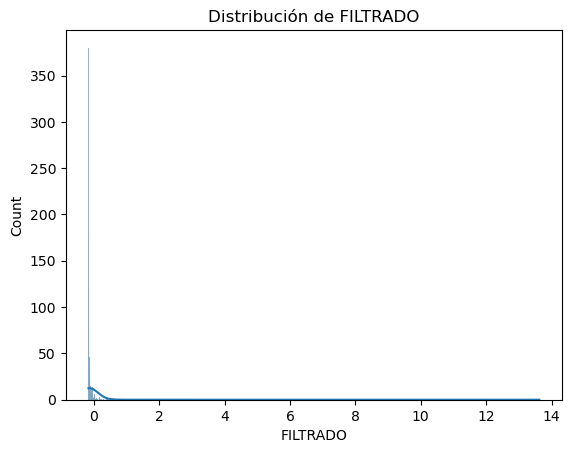

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


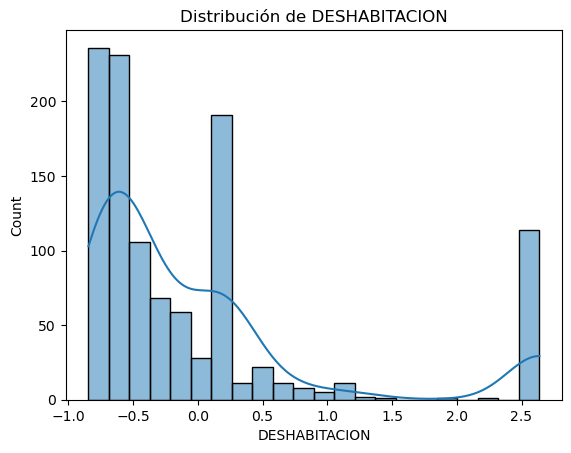

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


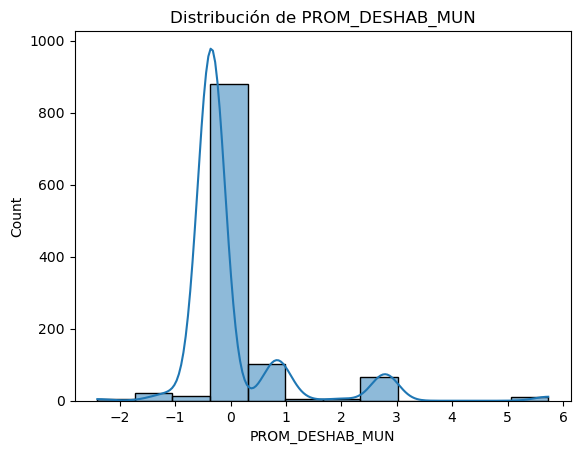

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


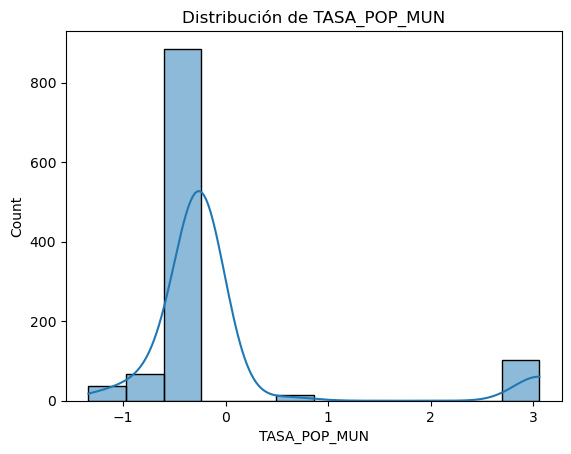

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


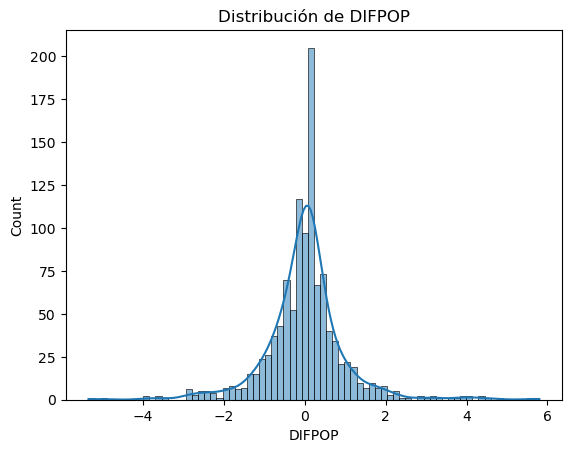

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


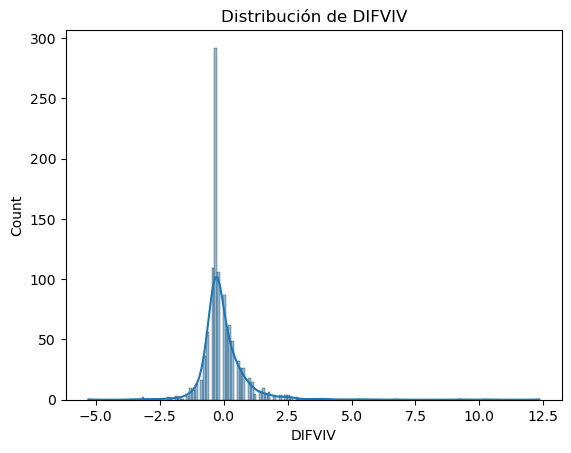

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


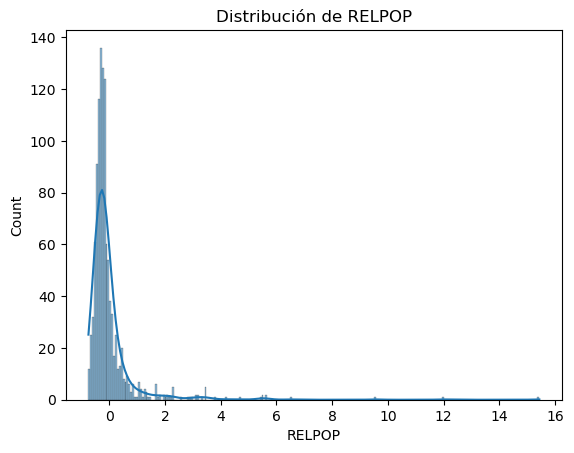

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


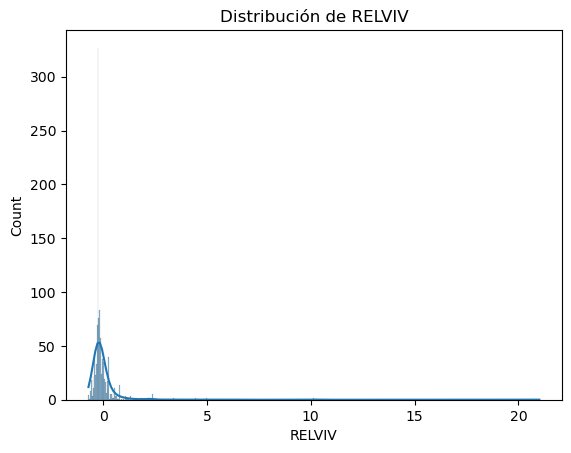

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


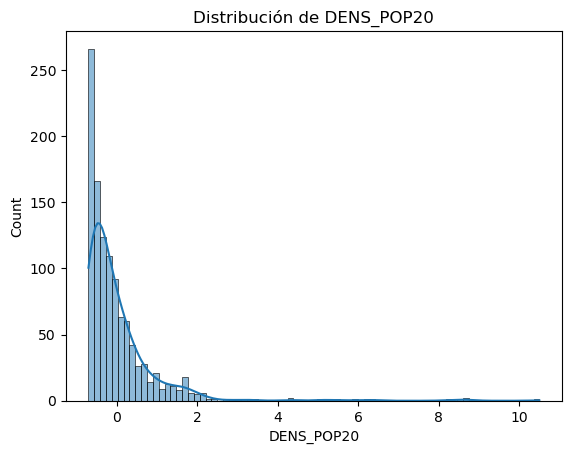

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


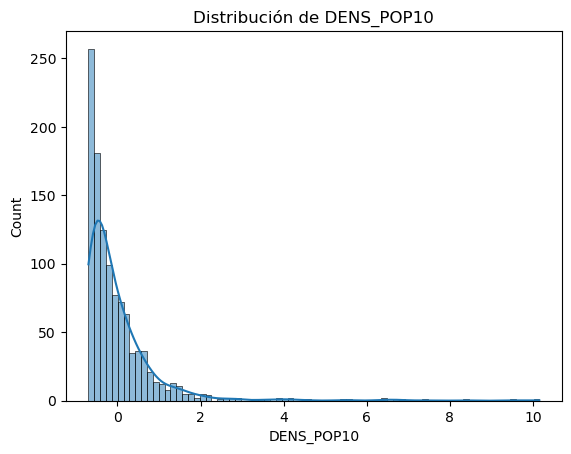

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


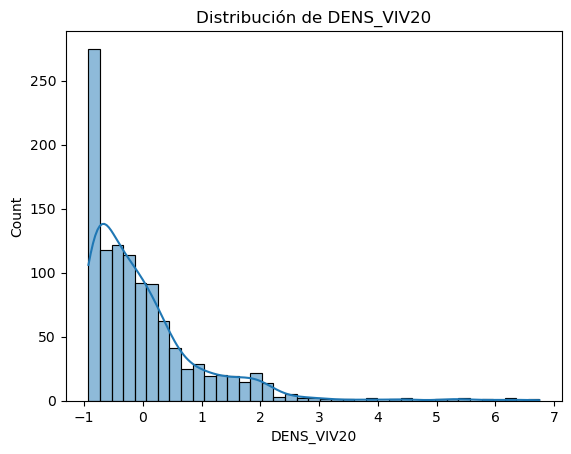

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


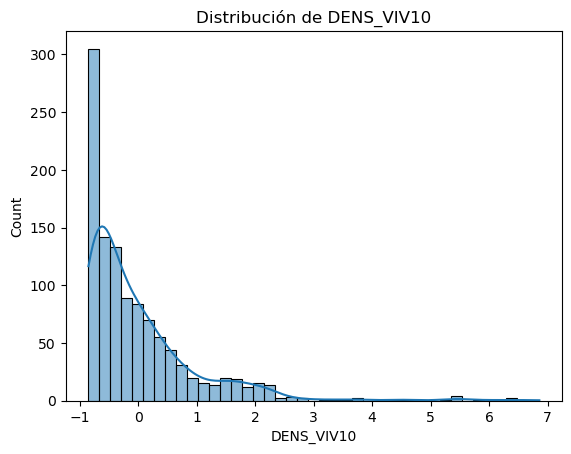

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


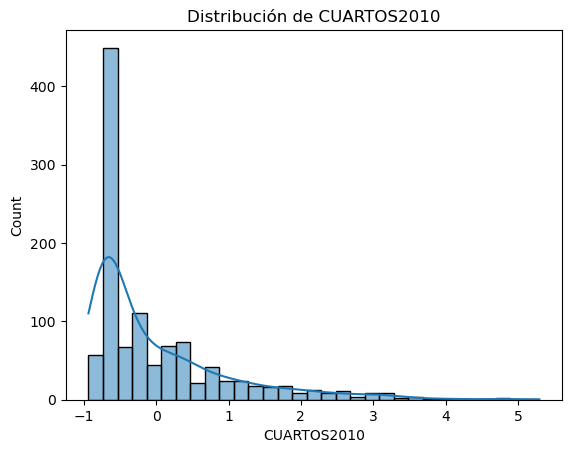

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


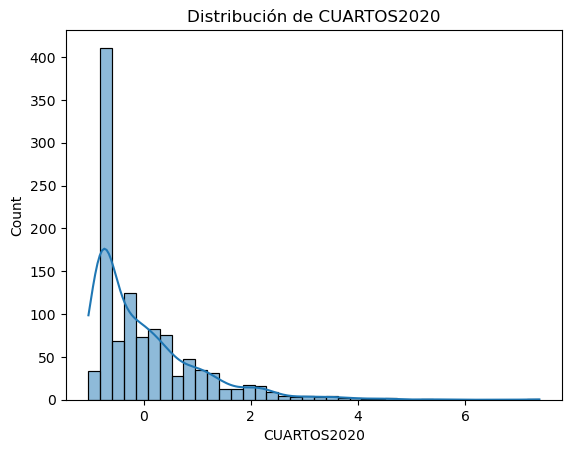

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


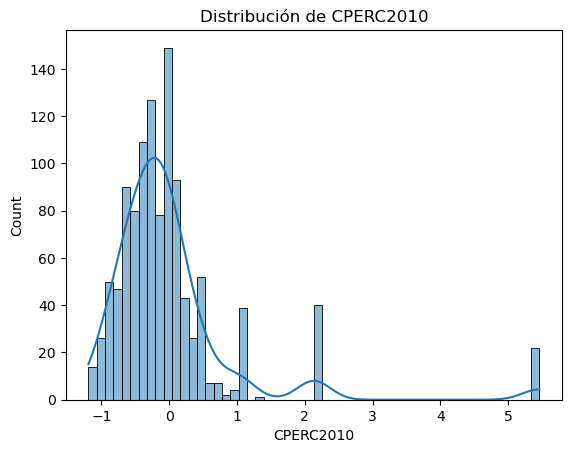

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


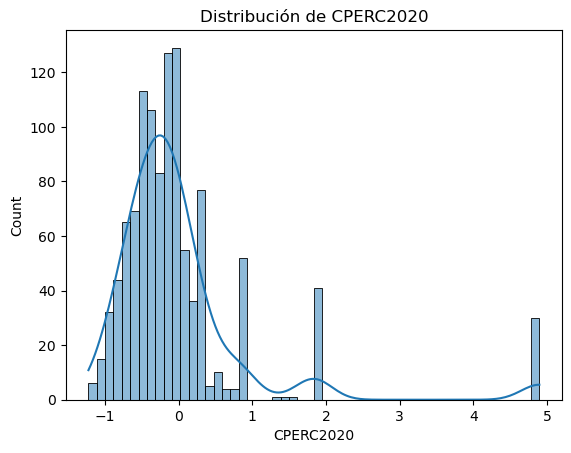

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


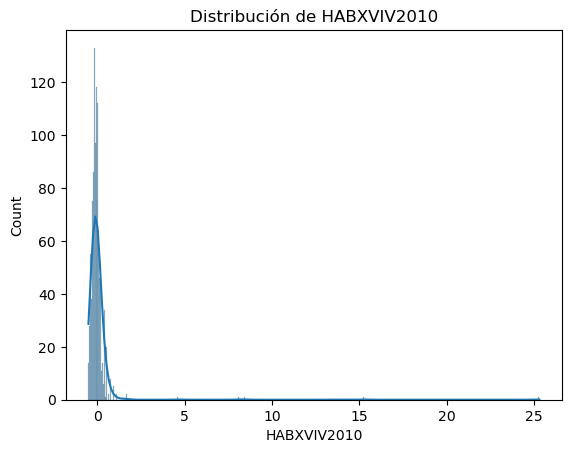

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


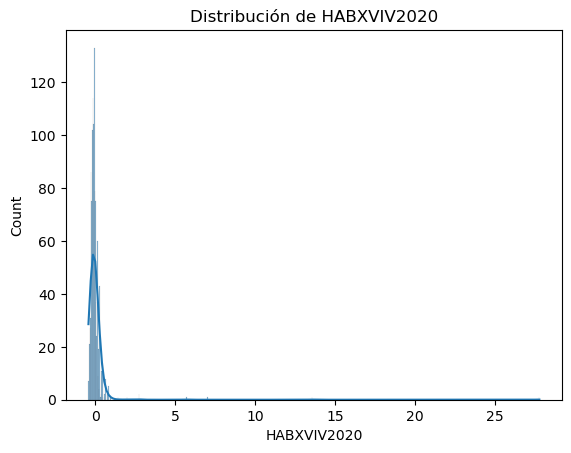

C:\Users\Alejandro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


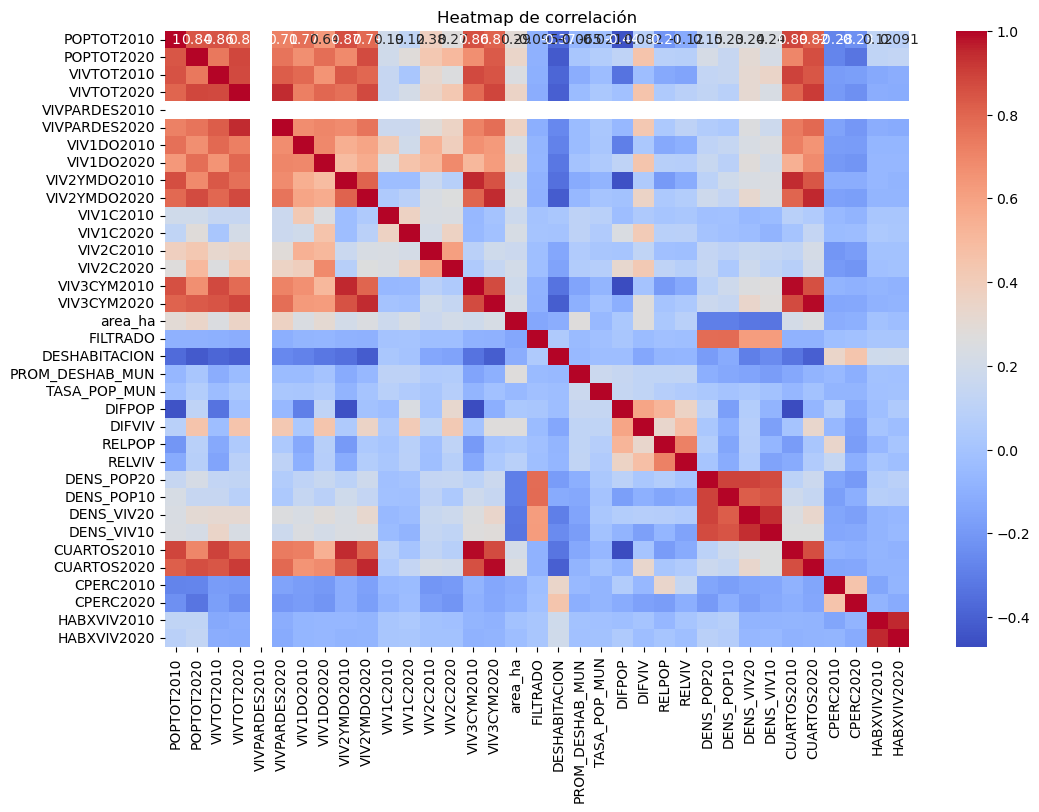

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para cada columna
for column in MAPA_df_f.columns:
    plt.figure()
    sns.histplot(MAPA_df_f[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Heatmap para visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(MAPA_df_f.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()
